# Column density Power spectrum

In [2]:
import aplpy
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## *Subregion of Polaris hi-resolution column density map ($\sim$PACS 250 $\mu$m resolution)*

INFO: Auto-setting vmin to  4.028e+19 [aplpy.core]
INFO: Auto-setting vmax to  2.398e+21 [aplpy.core]


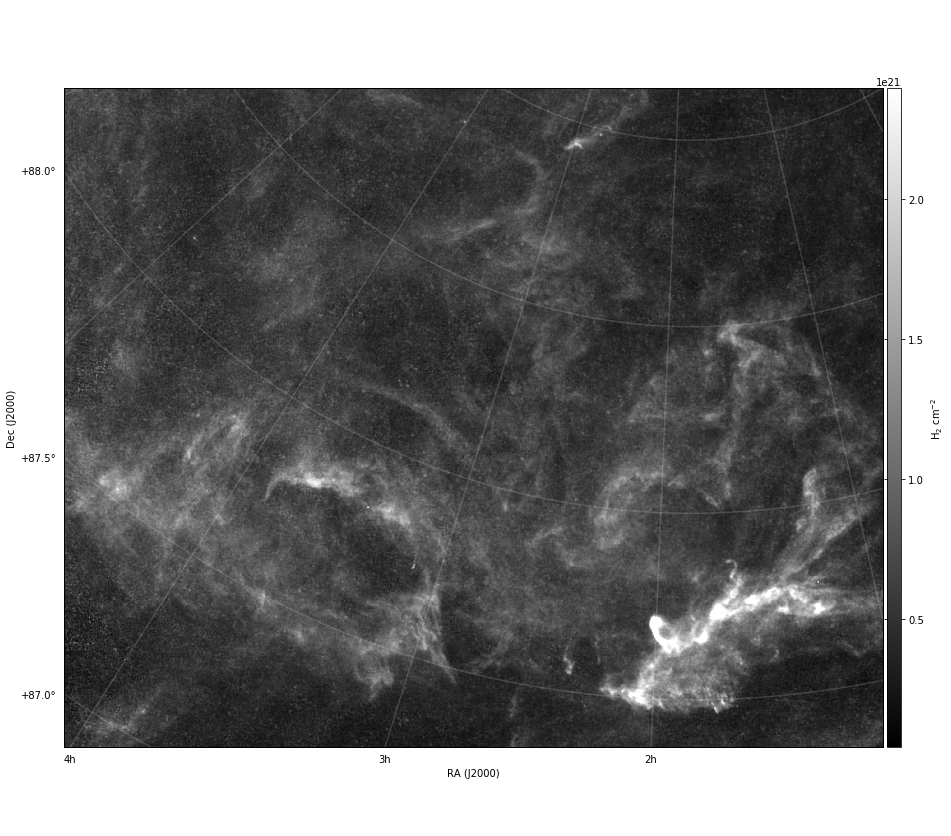

In [7]:
fig_all = plt.figure(1, figsize=(15,15))
figfile='/Users/robitaij/postdoc/Herschel/HGBS_ftp/analysis/HGBS_polaris_hires_cd_cut.fits'
fig = aplpy.FITSFigure(figfile,figure=fig_all)
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_xformat('hh')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_xspacing(0.25)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.add_grid()
fig.grid.set_alpha(0.15)
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

In [15]:
from powspec import powspec
from wavan import apodize, padding
from gauss_beam import gauss_beam
from rebin import congrid

In [8]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

In [10]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2634                                                  
NAXIS2  =                 2121                                                  
COMMENT Science data image                                                      
CREATOR = 'IDL               '                                                  
TELESCOP= 'Herschel Space Observatory'                                          
INSTRUME= 'SPIRE/PACS'                                                          
PROPOSAL= 'KPGT_pandre_1'                                                       
PRTITLE = 'Herschel Gould Belt Survey (HGBS)'                                   
COMMENT Reference publication of the survey: Andre' et al. (2010)               
COMMENT bibcode: 2010A&A...5

Text(0,0.5,u'$P(k)$ [$\\sigma$(H$_2$ cm$^{-2}$)]')

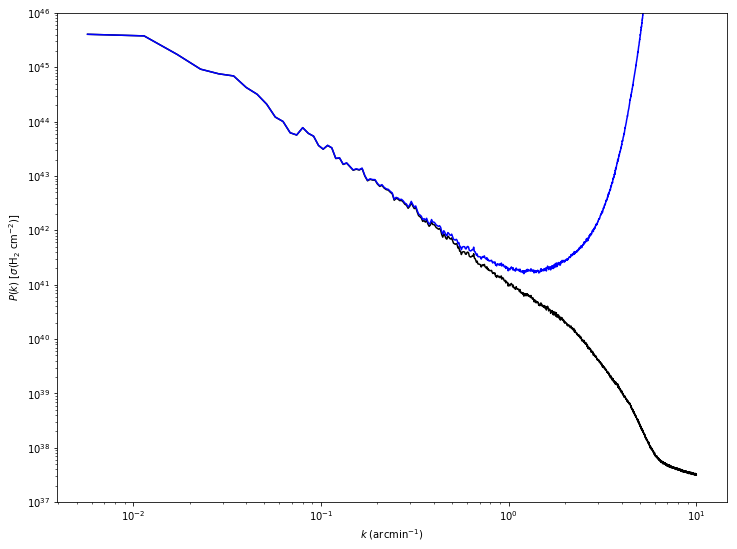

In [53]:
#Resolution in arcmin
reso = header['CDELT2'] * 60.

na = im.shape[1]
nb = im.shape[0]
imzm = im - np.mean(im)

#Apodization

tapper = apodize(nb,na,0.98)
imt = imzm *tapper
imr = padding(imt,3500,3500)

#Fourier power spectrum
#tab_k, spec_k = powspec(imr, reso=reso)

#Beam Power spectrum
#FWHM = 18.2 / (60.*reso) #Beam size at 70 micron should be around 5.5 arcsec
#beam = gauss_beam(FWHM,3500,3500,FWHM=True)
#tab_k, spec_beam = powspec(beam, reso=reso)
#spec_beamn = spec_beam/spec_beam[0]  #Spectrum normalisation

#Plot Fourier power spectrum
plt.figure(figsize=(12,9))
plt.plot(tab_k, spec_k, color='black',label='Fourier', linewidth=1.5)
plt.plot(tab_k, (spec_k)/spec_beamn, color='blue',label='Fourier corrected', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e37,1e46))
plt.xlabel(r"$k$ (arcmin$^{-1}$)")
plt.ylabel(r"$P(k)$ [$\sigma$(H$_2$ cm$^{-2}$)]")

## *Subregion of Polaris low-resolution column density map ($\sim$SPIRE 500 $\mu$m resolution)*

INFO: Auto-setting vmin to  4.749e+19 [aplpy.core]
INFO: Auto-setting vmax to  1.969e+21 [aplpy.core]


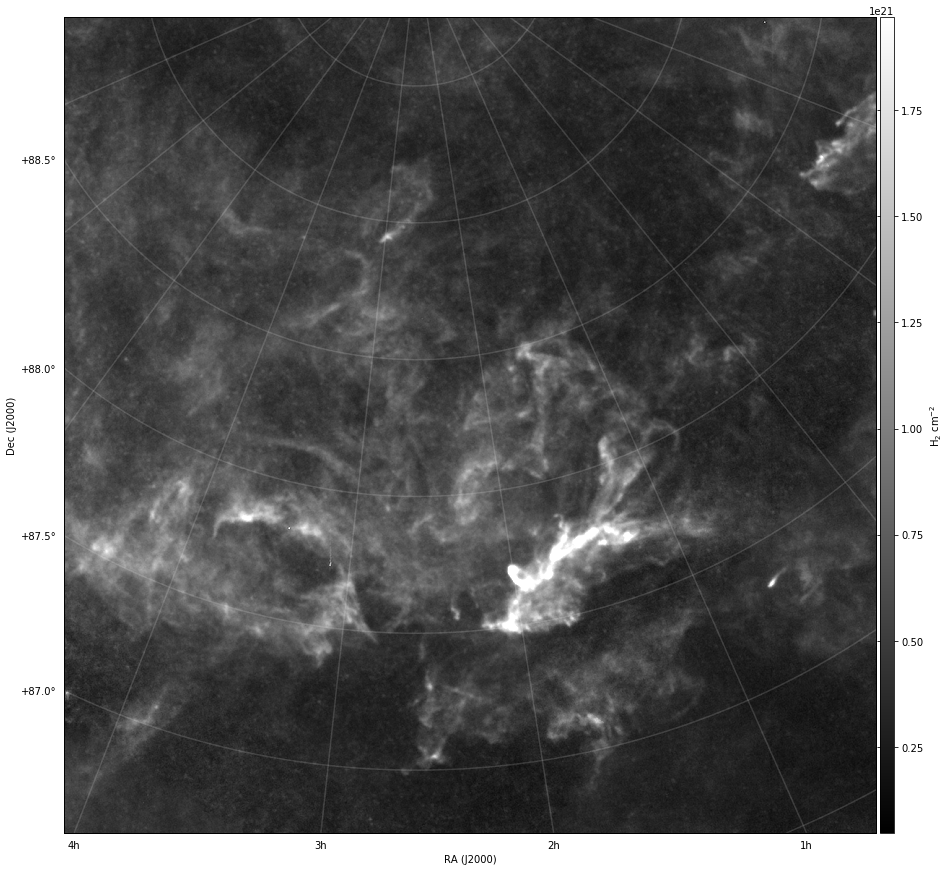

In [28]:
fig_all = plt.figure(1, figsize=(15,15))
figfile2 = '/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_polaris_cdens_rot_cut.fits'
fig = aplpy.FITSFigure(figfile2,figure=fig_all)
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_xformat('hh')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_xspacing(0.25)  # degrees
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.add_grid()
fig.grid.set_alpha(0.15)
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

In [31]:
#Read map
HDU2 = fits.open(figfile2)
im2 = HDU2[0].data
header2 = HDU2[0].header

In [32]:
header2

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3561                                                  
NAXIS2  =                 3576                                                  
COMMENT Science data image                                                      
CREATOR = 'IDL               '                                                  
TELESCOP= 'Herschel Space Observatory'                                          
INSTRUME= 'SPIRE/PACS'                                                          
PROPOSAL= 'KPGT_pandre_1'                                                       
PRTITLE = 'Herschel Gould Belt Survey (HGBS)'                                   
COMMENT Reference publication of the survey: Andre' et al. (2010)               
COMMENT bibcode: 2010A&A...5

Text(0,0.5,u'$P(k)$ [$\\sigma$(H$_2$ cm$^{-2}$)]')

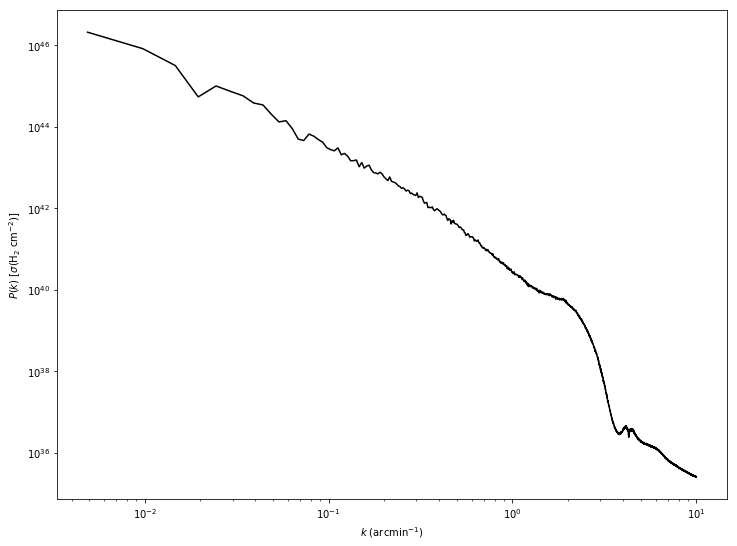

In [34]:
#Resolution in arcmin
reso2 = header2['CDELT2'] * 60.

na2 = im2.shape[1]
nb2 = im2.shape[0]
imzm2 = im2 - np.mean(im2)

#Apodization

tapper = apodize(nb2,na2,0.98)
imt2 = imzm2 *tapper
imr2 = padding(imt2,4096,4096)

#Fourier power spectrum
tab_k2, spec_k2 = powspec(imr2, reso=reso2)

#Plot Fourier power spectrum
plt.figure(figsize=(12,9))
plt.plot(tab_k2, spec_k2, color='black',label='Fourier', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ (arcmin$^{-1}$)")
plt.ylabel(r"$P(k)$ [$\sigma$(H$_2$ cm$^{-2}$)]")

## _Low resolution map binned to pixel size of 500 $\mu$m map_

Text(0,0.5,u'$P(k)$ [$\\sigma$(H$_2$ cm$^{-2}$)]')

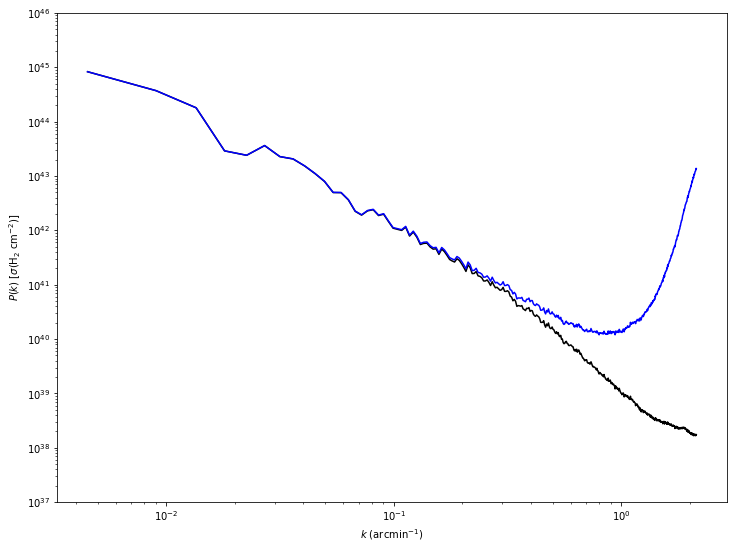

In [58]:
HDU3 = fits.open('/Users/robitaij/postdoc/Herschel/Gould Belt/HGBS_polaris_cdens_rot_rebin_cut.fits')
im3 = HDU3[0].data

#Resolution in arcmin
reso3 = HDU3[0].header['CDELT2'] * 60.

na3 = im3.shape[1]
nb3 = im3.shape[0]
imzm3 = im3 - np.mean(im3)

#Apodization

tapper = apodize(nb3,na3,0.98)
imt3 = imzm3 *tapper
imr3 = padding(imt3,950,950)

#Fourier power spectrum
tab_k3, spec_k3 = powspec(imr3, reso=reso3)

#Beam Power spectrum
FWHM = 36.3 / (60.*reso3) #Beam size at 70 micron should be around 5.5 arcsec
beam2 = gauss_beam(FWHM,950,950,FWHM=True)
tab_k3, spec_beam2 = powspec(beam2, reso=reso3)
spec_beamn2 = spec_beam2/spec_beam2[0]  #Spectrum normalisation

#Plot Fourier power spectrum
plt.figure(figsize=(12,9))
plt.plot(tab_k3, spec_k3, color='black',label='Fourier', linewidth=1.5)
plt.plot(tab_k3, spec_k3/spec_beamn2, color='blue',label='Fourier corrected', linewidth=1.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e37,1e46))
plt.xlabel(r"$k$ (arcmin$^{-1}$)")
plt.ylabel(r"$P(k)$ [$\sigma$(H$_2$ cm$^{-2}$)]")